IMPORTACIÓN DE PAQUETES

In [ ]:
##importar paquetes
import pandas as pd
import numpy as np
import random 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from io import StringIO
import pydotplus
from sklearn import tree
import pickle
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
#importar datos 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cargar bases
BD_Expuestos= pd.read_csv('/content/drive/MyDrive/ANALITICA3/BD_Expuestos_2.csv', sep=";")
BD_Sociodemografia= pd.read_csv('/content/drive/MyDrive/ANALITICA3/BD_Sociodemografia_2.csv' , encoding='latin-1', sep=";")
BD_Siniestros= pd.read_csv('/content/drive/MyDrive/ANALITICA3/DB_Siniestros_2.csv' , encoding='latin-1', sep=";")

TRATAMIENTO BD EXPUESTOS

In [ ]:
BD_Expuestos.head(2)

,Asegurado_Id,Poliza_Asegurado_Id,FECHA_INICIO,FECHA_CANCELACION,FECHA_FIN
0,16286173,125696117,2018/01/01,2018/04/10,2018/04/10
1,11885152,141320760,2018/01/01,NaN,2019/12/31


In [ ]:
BD_Expuestos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300900 entries, 0 to 300899
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Asegurado_Id         300900 non-null  int64 
 1   Poliza_Asegurado_Id  300900 non-null  int64 
 2   FECHA_INICIO         300900 non-null  object
 3   FECHA_CANCELACION    151963 non-null  object
 4   FECHA_FIN            300900 non-null  object
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [ ]:
#Analizar dimensión, tipos y nulos
print(BD_Expuestos.shape)
print('-------------------------------------------------')
print(BD_Expuestos.isnull().sum())
print('-------------------------------------------------')
print(BD_Expuestos.dtypes)
print('-------------------------------------------------')

(300900, 5)
-------------------------------------------------
Asegurado_Id                0
Poliza_Asegurado_Id         0
FECHA_INICIO                0
FECHA_CANCELACION      148937
FECHA_FIN                   0
dtype: int64
-------------------------------------------------
Asegurado_Id            int64
Poliza_Asegurado_Id     int64
FECHA_INICIO           object
FECHA_CANCELACION      object
FECHA_FIN              object
dtype: object
-------------------------------------------------


In [ ]:
#Cambiar nombres
BD_Expuestos= BD_Expuestos.rename(columns={'Asegurado_Id':'id_cliente', 'Poliza_Asegurado_Id':'cod_poliza'})

In [ ]:
#Cambiar el nombre de las columnas a minusculas
BD_Expuestos.columns = BD_Expuestos.columns.str.lower()
BD_Expuestos.columns

Index(['id_cliente', 'cod_poliza', 'fecha_inicio', 'fecha_cancelacion',
       'fecha_fin'],
      dtype='object')

In [ ]:
#Se arregla el tipo de datos
BD_Expuestos=BD_Expuestos.convert_dtypes()
BD_Expuestos.dtypes

id_cliente            Int64
cod_poliza            Int64
fecha_inicio         string
fecha_cancelacion    string
fecha_fin            string
dtype: object

In [ ]:
edit = BD_Expuestos

In [ ]:
BD_Expuestos['FI'] = pd.to_datetime(BD_Expuestos['fecha_inicio'])
BD_Expuestos['fecha_cancelacion'] = pd.to_datetime(BD_Expuestos['fecha_cancelacion'])
BD_Expuestos['fecha_fin'] = pd.to_datetime(BD_Expuestos['fecha_fin'])
BD_Expuestos['FF'] = BD_Expuestos[['fecha_cancelacion','fecha_fin']].min(axis=1)
BD_Expuestos['EXPO'] = (BD_Expuestos['FF'] - BD_Expuestos['FI'])/ np.timedelta64(2, 'Y') #((ff-fi)/)
BD_Expuestos = BD_Expuestos.sort_values(['id_cliente', 'fecha_inicio'],
              ascending = [True, True])
BD_Expuestos

,id_cliente,cod_poliza,fecha_inicio,fecha_cancelacion,fecha_fin,FI,FF,EXPO
266073,738284,89612446,2018/01/01,2018-02-01,2018-02-01,2018-01-01,2018-02-01,0.042438
267387,738288,88146604,2018/01/01,2018-11-08,2018-11-08,2018-01-01,2018-11-08,0.425745
162796,738288,175992661,2018/11/08,NaT,2019-12-31,2018-11-08,2019-12-31,0.572223
99970,738294,89612649,2018/01/01,2019-12-31,2019-12-31,2018-01-01,2019-12-31,0.997967
152420,738303,120708179,2018/01/01,NaT,2019-12-31,2018-01-01,2019-12-31,0.997967
...,...,...,...,...,...,...,...,...
108906,58581939,168944085,2018/05/15,NaT,2019-12-31,2018-05-15,2019-12-31,0.814527
53059,58581989,132872337,2018/01/01,NaT,2019-12-31,2018-01-01,2019-12-31,0.997967
21750,58584529,96109296,2018/01/01,2018-09-01,2018-09-01,2018-01-01,2018-09-01,0.332656
110303,58584580,159465186,2018/01/01,NaT,2019-12-31,2018-01-01,2019-12-31,0.997967


In [ ]:
#Expo_2_anos = sum(BD_Expuestos[BD_Expuestos['sexo'] == 'F'].groupby('id_cliente')['EXPO'].sum())

TRATAMIENTO BD SINIESTROS

In [ ]:
#Ver información
BD_Siniestros.info

<bound method DataFrame.info of          Mes_Pago  Asegurado_Id  \
0          201803       4834968   
1          201909      14915125   
2          201807      42959949   
3          201803      30540131   
4          201905      21442420   
...           ...           ...   
1048570    201907       9822689   
1048571    201807       4806249   
1048572    201902      10899044   
1048573    201808       3482153   
1048574    201805      38513672   

                                            Reclamacion Diagnostico_Codigo  \
0                               EXAMENES DE DIAGNOSTICO               Z011   
1                               EXAMENES DE DIAGNOSTICO                  9   
2                               EXAMENES DE DIAGNOSTICO                  9   
3                                      CONSULTA EXTERNA                  9   
4                                   LABORATORIO CLINICO                  9   
...                                                 ...                ...   
1

In [ ]:
#Ver columnas
BD_Siniestros.columns

Index(['Mes_Pago', 'Asegurado_Id', 'Reclamacion', 'Diagnostico_Codigo',
       'Diagnostico_Desc', 'Eventos', 'Valor_Pagado'],
      dtype='object')

In [ ]:
#Analizar dimensión, tipos y nulos
print(BD_Siniestros.shape)
print('-------------------------------------------------')
print(BD_Siniestros.isnull().sum())
print('-------------------------------------------------')
print(BD_Siniestros.dtypes)
print('-------------------------------------------------')

(1048575, 7)
-------------------------------------------------
Mes_Pago              0
Asegurado_Id          0
Reclamacion           0
Diagnostico_Codigo    0
Diagnostico_Desc      0
Eventos               0
Valor_Pagado          0
dtype: int64
-------------------------------------------------
Mes_Pago                int64
Asegurado_Id            int64
Reclamacion            object
Diagnostico_Codigo     object
Diagnostico_Desc       object
Eventos                 int64
Valor_Pagado          float64
dtype: object
-------------------------------------------------


In [ ]:
#Cambiar nombres
BD_Siniestros= BD_Siniestros.rename(columns={'Asegurado_Id':'id_cliente', 'Diagnostico_Codigo':'cod_diagnostico'})

In [ ]:
#Cambiar el nombre de las columnas a minusculas
BD_Siniestros.columns = BD_Siniestros.columns.str.lower()
BD_Siniestros.columns

Index(['mes_pago', 'id_cliente', 'reclamacion', 'cod_diagnostico',
       'diagnostico_desc', 'eventos', 'valor_pagado'],
      dtype='object')

In [ ]:
#Se arregla el tipo de datos
BD_Siniestros=BD_Siniestros.convert_dtypes()
BD_Siniestros.dtypes

mes_pago              Int64
id_cliente            Int64
reclamacion          string
cod_diagnostico      string
diagnostico_desc     string
eventos               Int64
valor_pagado        Float64
dtype: object

In [ ]:
BD_Siniestro[BD_Siniestro.cod_diagnostico.str.isnumeric()]

TRATAMIENTO BD DEMOGRAFIA

In [ ]:
#Ver información
BD_Sociodemografia.info()
BD_Sociodemografia.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267312 entries, 0 to 267311
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Asegurado_Id        267312 non-null  int64 
 1   Sexo_Cd             267312 non-null  object
 2   FechaNacimiento     267312 non-null  object
 3   Regional            267311 non-null  object
 4   CANCER              267312 non-null  int64 
 5   EPOC                267312 non-null  int64 
 6   DIABETES            267312 non-null  int64 
 7   HIPERTENSION        267312 non-null  int64 
 8   ENF_CARDIOVASCULAR  267312 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 18.4+ MB


Asegurado_Id          267233
Sexo_Cd                    3
FechaNacimiento        29945
Regional                   6
CANCER                     2
EPOC                       2
DIABETES                   2
HIPERTENSION               2
ENF_CARDIOVASCULAR         2
dtype: int64

In [ ]:
#Ver columnas
BD_Sociodemografia.columns

Index(['Asegurado_Id', 'Sexo_Cd', 'FechaNacimiento', 'Regional', 'CANCER',
       'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR'],
      dtype='object')

In [ ]:
#Cambiar nombres
BD_Sociodemografia= BD_Sociodemografia.rename(columns={'Asegurado_Id':'id_cliente', 'Sexo_Cd':'sexo', 'FechaNacimiento':'fecha_nacimiento'})

In [ ]:
#Cambiar el nombre de las columnas a minusculas
BD_Sociodemografia.columns = BD_Sociodemografia.columns.str.lower()
BD_Sociodemografia.columns

Index(['id_cliente', 'sexo', 'fecha_nacimiento', 'regional', 'cancer', 'epoc',
       'diabetes', 'hipertension', 'enf_cardiovascular'],
      dtype='object')

In [ ]:
#Se arregla el tipo de datos
BD_Sociodemografia=BD_Sociodemografia.convert_dtypes()
BD_Sociodemografia.dtypes

id_cliente             Int64
sexo                  string
fecha_nacimiento      string
regional              string
cancer                 Int64
epoc                   Int64
diabetes               Int64
hipertension           Int64
enf_cardiovascular     Int64
dtype: object

In [ ]:
BD_Sociodemografia.columns

Index(['id_cliente', 'sexo', 'fecha_nacimiento', 'regional', 'cancer', 'epoc',
       'diabetes', 'hipertension', 'enf_cardiovascular'],
      dtype='object')

In [ ]:
#Variable Sexo cambiar por femenino
BD_Sociodemografia['sexo'].value_counts()

F     145430
M     121877
-1         5
Name: sexo, dtype: Int64

In [ ]:
#Remplazar 
dictionary ={
    '-1':'F'
}

In [ ]:
#Variable -1 cambiarla por F
BD_Sociodemografia['sexo'].replace(dictionary, inplace=True)

In [ ]:
BD_Sociodemografia['id_cliente'].unique().sum()

6655895950381

In [ ]:
#Variable Sexo cambiar por femenino
BD_Sociodemografia['regional'].value_counts()

REGIONAL CENTRO          127149
REGIONAL ANTIOQUIA        49722
REGIONAL OCCIDENTE        46180
REGIONAL NORTE            34845
REGIONAL EJE CAFETERO      9342
Sin Información              73
Name: regional, dtype: Int64

In [ ]:
#Remplazar 
dictionary ={
    'Sin Información':'regional'
}

In [ ]:
#Variable sin identificación cambiaral por regional de la columna region
BD_Sociodemografia['regional'].replace(dictionary, inplace =True)

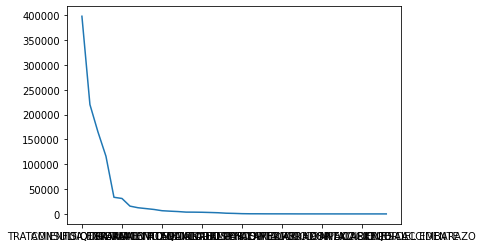

In [ ]:
import matplotlib.pyplot as plt
BD_Siniestros['reclamacion'].value_counts().plot()

UNION TODAS LAS BASES DE DATOS

In [ ]:
#Se unen las tres bases de datos por medio de id_cliente
union_exp = BD_Siniestros.set_index('id_cliente').join(BD_Sociodemografia.set_index('id_cliente'), on='id_cliente')
union_exp_prueba= BD_Expuestos.set_index('id_cliente').join(union_exp, on='id_cliente')

In [ ]:
union_exp_prueba

,cod_poliza,fecha_inicio,fecha_cancelacion,fecha_fin,FI,FF,EXPO,mes_pago,reclamacion,cod_diagnostico,...,eventos,valor_pagado,sexo,fecha_nacimiento,regional,cancer,epoc,diabetes,hipertension,enf_cardiovascular
id_cliente,,,,,,,,,,,,,,,,,,,,,
738284,89612446,2018/01/01,2018-02-01,2018-02-01,2018-01-01,2018-02-01,0.042438,201801,CONSULTA EXTERNA,9,...,1,66960.0,M,18/11/1967,REGIONAL CENTRO,0,0,0,0,0
738284,89612446,2018/01/01,2018-02-01,2018-02-01,2018-01-01,2018-02-01,0.042438,201802,FISIOTERAPIA ILIMITADA,9,...,2,42656.0,M,18/11/1967,REGIONAL CENTRO,0,0,0,0,0
738288,88146604,2018/01/01,2018-11-08,2018-11-08,2018-01-01,2018-11-08,0.425745,201912,CONSULTA EXTERNA,9,...,1,1984.0,M,8/11/1976,REGIONAL ANTIOQUIA,0,0,0,0,0
738288,88146604,2018/01/01,2018-11-08,2018-11-08,2018-01-01,2018-11-08,0.425745,201909,CONSULTA EXTERNA,9,...,1,85312.0,M,8/11/1976,REGIONAL ANTIOQUIA,0,0,0,0,0
738288,175992661,2018/11/08,NaT,2019-12-31,2018-11-08,2019-12-31,0.572223,201912,CONSULTA EXTERNA,9,...,1,1984.0,M,8/11/1976,REGIONAL ANTIOQUIA,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58584580,159465186,2018/01/01,NaT,2019-12-31,2018-01-01,2019-12-31,0.997967,201911,TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES,T140,...,1,141112.0,F,21/08/2004,REGIONAL CENTRO,0,0,0,0,0
58584580,159465186,2018/01/01,NaT,2019-12-31,2018-01-01,2019-12-31,0.997967,201809,CONSULTA DE URGENCIAS,9,...,1,67580.0,F,21/08/2004,REGIONAL CENTRO,0,0,0,0,0
58584580,159465186,2018/01/01,NaT,2019-12-31,2018-01-01,2019-12-31,0.997967,201912,CONSULTA DE URGENCIAS,9,...,1,72912.0,F,21/08/2004,REGIONAL CENTRO,0,0,0,0,0


In [ ]:
union_exp.columns

Index(['mes_pago', 'reclamacion', 'cod_diagnostico', 'diagnostico_desc',
       'eventos', 'valor_pagado', 'sexo', 'fecha_nacimiento', 'regional',
       'cancer', 'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular'],
      dtype='object')

In [ ]:
#Ver columnas de la base de datos grande
union_exp_prueba.columns

Index(['cod_poliza', 'fecha_inicio', 'fecha_cancelacion', 'fecha_fin', 'FI',
       'FF', 'EXPO', 'mes_pago', 'reclamacion', 'cod_diagnostico',
       'diagnostico_desc', 'eventos', 'valor_pagado', 'sexo',
       'fecha_nacimiento', 'regional', 'cancer', 'epoc', 'diabetes',
       'hipertension', 'enf_cardiovascular'],
      dtype='object')

In [ ]:
#Analizar dimensión, tipos y nulos
print(union_exp_prueba.shape)
print('-------------------------------------------------')
print(union_exp_prueba.isnull().sum())
print('-------------------------------------------------')
print(union_exp_prueba.dtypes)
print('-------------------------------------------------')

(1263636, 21)
-------------------------------------------------
cod_poliza                 0
fecha_inicio               0
fecha_cancelacion     713357
fecha_fin                  0
FI                         0
FF                         0
EXPO                       0
mes_pago               65195
reclamacion            65195
cod_diagnostico        65195
diagnostico_desc       65195
eventos                65195
valor_pagado           65195
sexo                   65195
fecha_nacimiento       65195
regional               65197
cancer                 65195
epoc                   65195
diabetes               65195
hipertension           65195
enf_cardiovascular     65195
dtype: int64
-------------------------------------------------
cod_poliza                     Int64
fecha_inicio                  string
fecha_cancelacion     datetime64[ns]
fecha_fin             datetime64[ns]
FI                    datetime64[ns]
FF                    datetime64[ns]
EXPO                         float64
mes_p

**ANALISIS EXPLORATORIO**

In [ ]:
union_exp_prueba.head(5)

,cod_poliza,fecha_inicio,fecha_cancelacion,fecha_fin,FI,FF,EXPO,mes_pago,reclamacion,cod_diagnostico,...,eventos,valor_pagado,sexo,fecha_nacimiento,regional,cancer,epoc,diabetes,hipertension,enf_cardiovascular
id_cliente,,,,,,,,,,,,,,,,,,,,,
738284,89612446,2018/01/01,2018-02-01,2018-02-01,2018-01-01,2018-02-01,0.042438,201801,CONSULTA EXTERNA,9,...,1,66960.0,M,18/11/1967,REGIONAL CENTRO,0,0,0,0,0
738284,89612446,2018/01/01,2018-02-01,2018-02-01,2018-01-01,2018-02-01,0.042438,201802,FISIOTERAPIA ILIMITADA,9,...,2,42656.0,M,18/11/1967,REGIONAL CENTRO,0,0,0,0,0
738288,88146604,2018/01/01,2018-11-08,2018-11-08,2018-01-01,2018-11-08,0.425745,201912,CONSULTA EXTERNA,9,...,1,1984.0,M,8/11/1976,REGIONAL ANTIOQUIA,0,0,0,0,0
738288,88146604,2018/01/01,2018-11-08,2018-11-08,2018-01-01,2018-11-08,0.425745,201909,CONSULTA EXTERNA,9,...,1,85312.0,M,8/11/1976,REGIONAL ANTIOQUIA,0,0,0,0,0
738288,175992661,2018/11/08,NaT,2019-12-31,2018-11-08,2019-12-31,0.572223,201912,CONSULTA EXTERNA,9,...,1,1984.0,M,8/11/1976,REGIONAL ANTIOQUIA,0,0,0,0,0


In [ ]:
union_exp.columns

Index(['mes_pago', 'reclamacion', 'cod_diagnostico', 'diagnostico_desc',
       'eventos', 'valor_pagado', 'sexo', 'fecha_nacimiento', 'regional',
       'cancer', 'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular'],
      dtype='object')

In [ ]:
# ¿Cual es el sexo que mas hace reclamaciones?
p1 = union_exp_prueba.groupby(['reclamacion','sexo'])['cod_poliza'].count().reset_index().sort_values(by= 'cod_poliza', ascending = False).head(30)
p1

,reclamacion,sexo,cod_poliza
16,CONSULTA EXTERNA,F,279971
17,CONSULTA EXTERNA,M,175495
22,EXAMENES DE DIAGNOSTICO,F,169569
32,LABORATORIO CLINICO,F,125376
23,EXAMENES DE DIAGNOSTICO,M,81202
14,CONSULTA DE URGENCIAS,F,79581
33,LABORATORIO CLINICO,M,62864
15,CONSULTA DE URGENCIAS,M,53577
7,CIRUGIA AMBULATORIA POR ENFERMEDAD,F,21634
26,FISIOTERAPIA ILIMITADA,F,20129


In [ ]:
import plotly.express as px
p1 = union_exp_prueba.groupby(['reclamacion','sexo'])['cod_poliza'].count().reset_index().sort_values(by= 'cod_poliza', ascending = False).head(30)
fig= px.bar(p1, x='sexo', y= 'cod_poliza', color='reclamacion', title="<b>sexo y 10 reclamaciones más frecuentes<b>", barmode = 'group')

In [ ]:
fig.update_layout(
    xaxis_title = 'sexo',
    yaxis_title= 'Numero de cliente',
    template= 'simple_white',
    title_x = 0.25)
fig.show()

In [ ]:
#pregunta dos
#p3 = union_exp_prueba.groupby(['cod_poliza'])['fecha_inicio'].count().reset_index().sort_values(by= 'fecha_inicio', ascending = False).head(10)
#p3
#p2 = pd.Series(union_exp_prueba.fecha_inicio.to_month_name().value_counts()).reset_index().rename(Column={'index':'month'})

In [ ]:
#Que tipo de reclamación es más constosa
p2 = union_exp_prueba.groupby(['reclamacion'])['valor_pagado'].sum().reset_index().sort_values(by= 'valor_pagado', ascending = False).head(10)
p2['valor_pagado']=p2['valor_pagado']/p2['valor_pagado'].sum()
p2['valos_pagado_millones']=p2['valor_pagado'].round(decimals=3)
p2 = p2.drop(['valor_pagado'],axis=1)
#df.drop(['B', 'C'], axis=1)
p2


,reclamacion,valos_pagado_millones
12,EXAMENES DE DIAGNOSTICO,0.198
4,CIRUGIA AMBULATORIA POR ENFERMEDAD,0.165
34,TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERM...,0.163
9,CONSULTA EXTERNA,0.117
17,LABORATORIO CLINICO,0.112
29,TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD,0.095
22,TRATAMIENTO AMBULATORIO POR CANCER,0.054
8,CONSULTA DE URGENCIAS,0.051
1,ATENCION DEL PARTO,0.028
19,PAMD,0.017


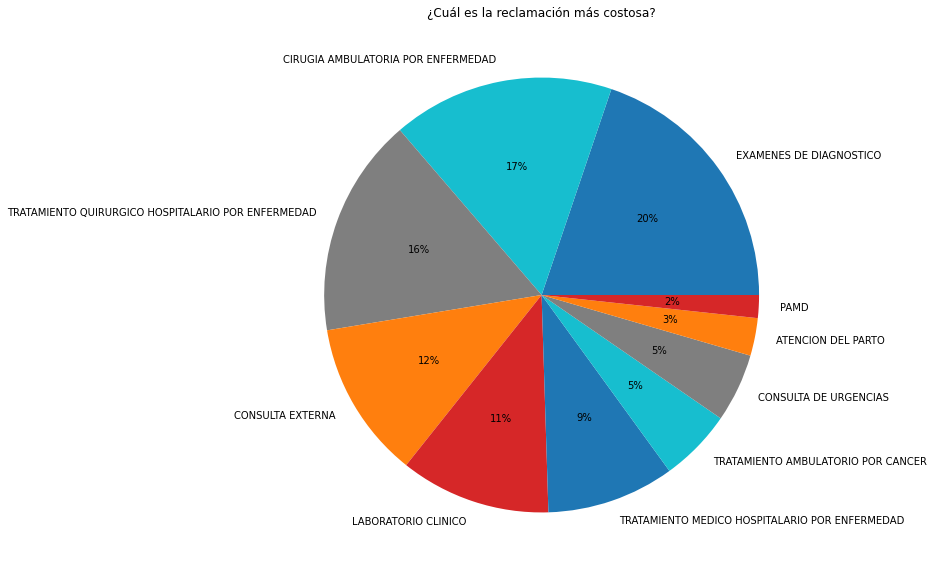

In [ ]:
fig, ax = plt.subplots(figsize =(28,10))
ax.pie(p2.valos_pagado_millones, labels = p2.reclamacion, colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red'],autopct='%.0f%%')
ax.set_title("¿Cuál es la reclamación más costosa?")
plt.show()
       

In [ ]:
#pregunta 3 ¿Cuál es la edad de las personas que más reclaman?
union_exp_prueba.fecha_nacimiento =pd.to_datetime(union_exp_prueba.fecha_nacimiento)
union_exp_prueba['edad']= 2019-union_exp_prueba.fecha_nacimiento.dt.year
union_exp_prueba.loc[union_exp_prueba [union_exp_prueba.edad <0].index,['edad']]=0
p3 = union_exp_prueba.groupby(['edad'])['cod_poliza'].count().reset_index().sort_values(by= 'cod_poliza', ascending = False).head(10)
p3


,edad,cod_poliza
39,39.0,31053
38,38.0,30721
37,37.0,30653
35,35.0,30612
36,36.0,29695
40,40.0,29115
34,34.0,28727
2,2.0,27939
41,41.0,27395
33,33.0,27353


In [ ]:
p3 = union_exp_prueba.groupby(['edad'])['cod_poliza'].count().reset_index().sort_values(by= 'cod_poliza', ascending = False)
fig= px.bar(p3, x='edad', y= 'cod_poliza', color='cod_poliza', title="<b>Edad de las personas que más reclaman<b>", barmode = 'group')

fig.update_layout(
    xaxis_title = 'Edad',
    yaxis_title= 'Numero de reclamaciones',
    template= 'simple_white',
    title_x = 0.5)
fig.show()

In [ ]:
#pregunta 4  ¿ En qué mes se adquieren más seguros?
union_exp_prueba['mes']=pd.DatetimeIndex(union_exp_prueba['fecha_inicio']).month
p4 = union_exp_prueba.groupby(['mes'])['cod_poliza'].count().reset_index().sort_values(by= 'cod_poliza', ascending= True).head(12)
p4

,mes,cod_poliza
10,11,23392
9,10,24807
5,6,25425
7,8,26196
6,7,26607
8,9,26735
2,3,28837
4,5,29042
3,4,30162
11,12,32812


In [ ]:
fig= px.bar(p4, x='mes', y= 'cod_poliza',  title="<b>¿En qué mes se adquiere más seguros?<b>", barmode = 'group')
#fig.update_layout(font=dict(size=12))
#fig.show()

fig.update_layout(
    xaxis_title = 'mes',
    yaxis_title= 'cantidad de seguros',
    template= 'simple_white',
    title_x = 0.25)
fig.show()

In [ ]:
#pregunta 5  Cantidad de seguros por región según sexo
p5 = union_exp_prueba.groupby(['regional','sexo'])['cod_poliza'].count().reset_index().sort_values(by= 'cod_poliza', ascending = False).head(30)
p5

fig= px.bar(p5, x='regional', y= 'cod_poliza', color='sexo', title="<b>cantidad de seguros por región según sexo<b>", barmode = 'group')

fig.update_layout(
    xaxis_title = 'regional',
    yaxis_title= 'cantidad por región según sexo',
    template= 'simple_white',
    title_x = 0.25)
fig.show()

In [ ]:
#Agregar edad y convertir en dummies sexo y regional
union_exp_string_columns= ['sexo','regional']
union_exp_prueba = pd.get_dummies(union_exp, columns=union_exp_string_columns)
union_exp_prueba['mes_pago'] = pd.to_datetime(union_exp_prueba['mes_pago'].map(lambda x: str(x)[:-2]))
union_exp_prueba['fecha_nacimiento']= pd.to_datetime(union_exp_prueba['fecha_nacimiento'])
union_exp_prueba['edad'] = (union_exp_prueba['mes_pago'] - union_exp_prueba['fecha_nacimiento'])/ np.timedelta64(1, 'Y')
union_exp_prueba = union_exp_prueba.drop(['diagnostico_desc','mes_pago','fecha_nacimiento'], axis=1)

In [ ]:
union_exp_prueba.columns

Index(['reclamacion', 'cod_diagnostico', 'eventos', 'valor_pagado', 'cancer',
       'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular', 'sexo_F',
       'sexo_M', 'regional_REGIONAL ANTIOQUIA', 'regional_REGIONAL CENTRO',
       'regional_REGIONAL EJE CAFETERO', 'regional_REGIONAL NORTE',
       'regional_REGIONAL OCCIDENTE', 'regional_regional', 'edad'],
      dtype='object')

In [ ]:
union_exp_string_columns= ['sexo','regional']
union_all_pd = pd.get_dummies(union_exp, columns=union_exp_string_columns)
union_all_pd['mes_pago'] = pd.to_datetime(union_all_pd['mes_pago'].map(lambda x: str(x)[:-2]))
union_all_pd['fecha_nacimiento']= pd.to_datetime(union_all_pd['fecha_nacimiento'])
union_all_pd['edad'] = (union_all_pd['mes_pago'] - union_all_pd['fecha_nacimiento'])/ np.timedelta64(1, 'Y')
union_all_pd = union_all_pd.drop(['diagnostico_desc','mes_pago','fecha_nacimiento'], axis=1)

In [ ]:
# Expo_2_anos_F = sum(union_exp_prueba[union_all_pd['sexo'] == 'F'].groupby('id_cliente')['EXPO'].sum())

In [ ]:
# #Calcular prima pura
# suma_de_eventos = len(BD_Siniestros[BD_Siniestros['reclamacion'] == 'EXAMENES DE DIAGNOSTICO'])
# Suma_valor_pagado = BD_Siniestros[BD_Siniestros['reclamacion'] == 'EXAMENES DE DIAGNOSTICO']['valor_pagado'].sum()
# frecuencia = suma_de_eventos / Expo_2_anos_F
# severidad = Suma_valor_pagado / suma_de_eventos
# prima_pura =  frecuencia * severidad
# prima_pura

In [ ]:
#Matriz de correlaciones de la base de datos grande 
cor = union_exp_prueba.corr()
cor_target = abs(cor["valor_pagado"])
relevant_features = cor_target[cor_target>0] ## DEFINIR ESTA VARIABLE
relevant_features_columns = list(relevant_features.index)

cor_relevante_features = union_exp_prueba[relevant_features_columns].corr()
union_all_factorized_features = union_exp_prueba[relevant_features_columns]
relevant_features

eventos                           0.001766
valor_pagado                      1.000000
cancer                            0.063381
epoc                              0.020864
diabetes                          0.012031
hipertension                      0.017263
enf_cardiovascular                0.020567
sexo_F                            0.009517
sexo_M                            0.009489
regional_REGIONAL ANTIOQUIA       0.002971
regional_REGIONAL CENTRO          0.006986
regional_REGIONAL EJE CAFETERO    0.000599
regional_REGIONAL NORTE           0.003211
regional_REGIONAL OCCIDENTE       0.003356
regional_regional                 0.000293
edad                              0.038431
Name: valor_pagado, dtype: float64

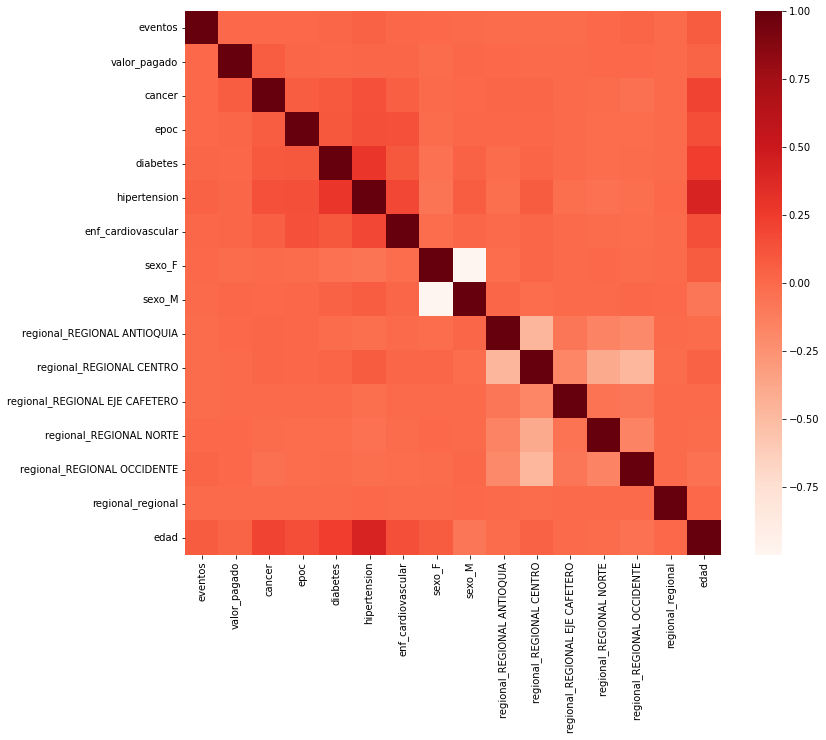

In [ ]:
# Grafico de la matriz de correlaciones
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(cor_relevante_features, annot=False, cmap=plt.cm.Reds)
plt.show()